# TP à rendre 2 Egalisation d'histogradmes
Dans ce TP, nous aimerions améliorer le contraste d'images par deux méthodes. Une méthode d'expansion de la dynamique, et une méthode d'égalisaton d'histogramme. La première image à traiter est dans un fichier npy à loader. Le reste des images sont dans le même dossier. 

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

# Lire et afficher l'image à utiliser

In [2]:
image = np.genfromtxt('image.csv', delimiter=';')


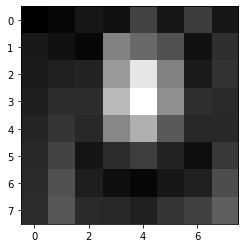

In [3]:
plt.imshow(image,cmap='gray')

# Calculer les métriques sur l'image
1.	Calculer la moyenne de luminance de l’image.
2.	Donner la dynamique de l’image (intervalle [Lmin, Lmax]).
3.	Calculer le contraste de l’image.
4.	Calculer l’écart type des niveaux de gris de l’image.


In [4]:
def Metriques(image) :
    #moyenne luminance 
    moy_lum = 0
    for l in image :
        for p in l :
            moy_lum += p
    moy_lum /= (len(image)*len(image[0]))
    

    #dynamique de l'image
    Lmin = np.amin(image)
    Lmax = np.amax(image)
    

    #contraste
    
    contraste = (Lmax - Lmin) / (Lmax + Lmin)

    #L'écart type des niveaux de gris
    ecart_type=0
    for l in image :
        for p in l :
            ecart_type += (p - moy_lum)**2

    ecart_type /= (len(image)*len(image[0]))
    ecart_type = ecart_type**(1/2)
    return moy_lum,Lmin,Lmax,contraste,ecart_type

moy_lum,Lmin,Lmax,contraste,ecart_type=Metriques(image)
print("La moyenne de luminance = " + str(moy_lum)) 
print("La dynamique de l'image ["+str(Lmin)+","+str(Lmax)+"]")   
print("Le contraste : " + str(contraste))
print("L'ecart type : " + str(ecart_type))

La moyenne de luminance = 76.078125
La dynamique de l'image [52.0,154.0]
Le contraste : 0.49514563106796117
L'ecart type : 20.916728269124093


# Histogramme et histogramme cumulé
5.	Construire l’histogramme de cette image ainsi que son histogramme normalisé.
6.	Construire l’histogramme cumulé de cette image ainsi que son histogramme cumulé normalisé.


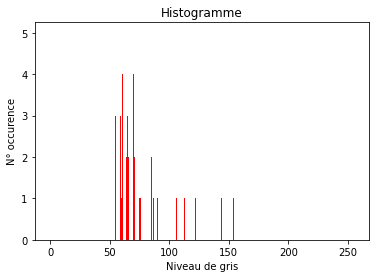

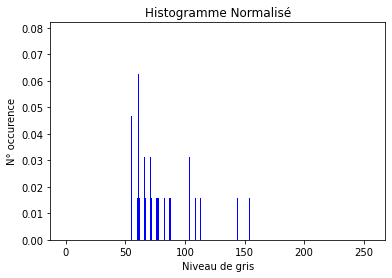

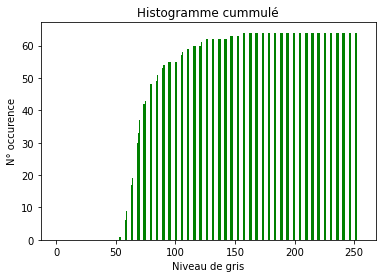

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015625, 0.015625, 0.015625, 0.0625, 0.0625, 0.0625, 0.09375, 0.140625, 0.15625, 0.21875, 0.234375, 0.265625, 0.296875, 0.34375, 0.375, 0.390625, 0.46875, 0.515625, 0.578125, 0.609375, 0.625, 0.65625, 0.65625, 0.671875, 0.6875, 0.703125, 0.71875, 0.75, 0.75, 0.75, 0.75, 0.765625, 0.765625, 0.796875, 0.796875, 0.8125, 0.828125, 0.828125, 0.84375, 0.84375, 0.84375, 0.84375, 0.859375, 0.859375, 0.859375, 0.859375, 0.859375, 0.859375, 0.859375, 0.859375, 0.859375, 0.859375, 0.890625, 0.890625, 0.90625, 0.90625, 0.90625, 0.921875, 0.921875, 0.921875, 0.921875, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.953125, 0.953125, 0.953125, 0.953125, 0.96875, 0.96875, 0.96875, 0.96875, 0.96875, 0.96875, 0.96875, 0

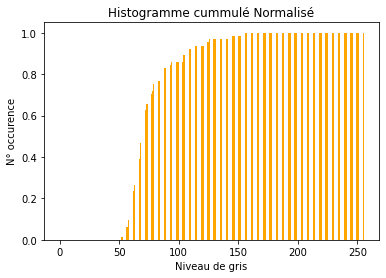

In [5]:
#une fonction qui peut generer tous les histogrammes d'une image 
def GenerateHistograms(image):
        
        image = image.astype(np.uint8)
        #Histogramme 
        hist_x=np.arange(256)
        hist_y=np.bincount(image.flatten(), minlength=256)

        #Histogramme Normlisé
        hist_n_y=[x/(len(image)*len(image[0])) for x in hist_y]

        #Histogramme cummulé
        hist_c_y=[hist_y[0]]
        for i in range(1,len(hist_y)) :
                hist_c_y.append(hist_c_y[i-1] + hist_y[i])          

        #Histogramme cummulé normalisé
        hist_cn_y=[x/(len(image)*len(image[0])) for x in hist_c_y]

        return hist_x,hist_y,hist_n_y,hist_c_y,hist_cn_y   


hist_x,hist_y,hist_n_y,hist_c_y,hist_cn_y=GenerateHistograms(image)   

plt.bar(hist_x, hist_y, color ='red',width = 0.4)
plt.xlabel("Niveau de gris")
plt.ylabel("N° occurence")
plt.title("Histogramme")
plt.show()

plt.bar(hist_x,hist_n_y, color ='blue',width = 0.4)
plt.xlabel("Niveau de gris")
plt.ylabel("N° occurence")
plt.title("Histogramme Normalisé")
plt.show()


plt.bar(hist_x,hist_c_y, color ='green',width = 0.4)
plt.xlabel("Niveau de gris")
plt.ylabel("N° occurence")
plt.title("Histogramme cummulé")
plt.show()

print(hist_cn_y)
plt.bar(hist_x,hist_cn_y, color ='orange',width = 0.4)
plt.xlabel("Niveau de gris")
plt.ylabel("N° occurence")
plt.title("Histogramme cummulé Normalisé")
plt.show()


# Comparer votre implémentation aux fonctions de opencv

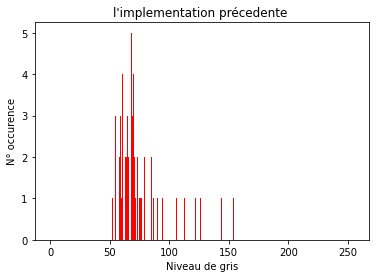

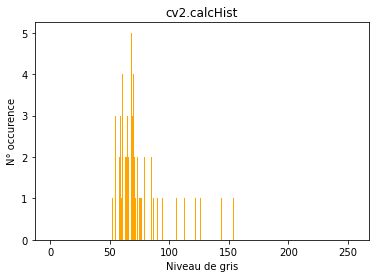

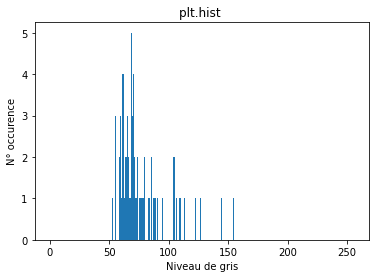

In [6]:


#l'implementation précedente
plt.bar(hist_x, hist_y, color ='red',width = 0.7)
plt.xlabel("Niveau de gris")
plt.ylabel("N° occurence")
plt.title("l'implementation précedente ")
plt.show()

#cv2.calcHist
image=image.astype(np.uint8)
calchist_y=cv2.calcHist([image],[0],None,[256],[0,256])
calchist_y=calchist_y.astype(np.uint8)
calchist_y=calchist_y.reshape(-1)

plt.bar(np.arange(0,256),calchist_y, color ='orange',width = 0.7)
plt.xlabel("Niveau de gris")
plt.ylabel("N° occurence")
plt.title("cv2.calcHist")
plt.show()


#plt.hist
plt.hist(image.reshape(-1),256,[0,256])
plt.xlabel("Niveau de gris")
plt.ylabel("N° occurence")
plt.title("plt.hist ")
plt.show()



- Expliquer la difference.
- comparer aussi avec les méthodes des autres librairies.

# 7.	Etendre l’histogramme et visualiser l’image résultante.

[[  3  15  55  35 191  55 175  55]
 [ 59  35  15 227 219 203  35 155]
 [ 67  87  95 239 251 227  67 159]
 [ 75 147 147 247 255 235 155 131]
 [ 99 167 119 231 243 211 119 119]
 [119 191  39 147 179  95  23 171]
 [131 203  75  23  15  55  87 195]
 [147 207 131 119  87 167 183 215]]


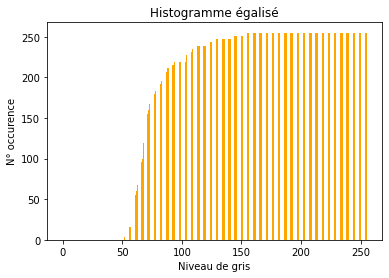

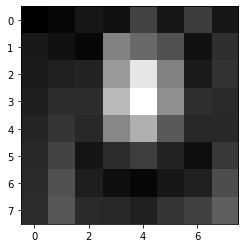

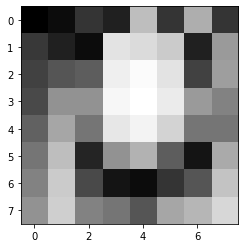

In [7]:
"""Une fonction pour etendre l'histogramme et construire la nouvelle image"""
def AmeliorationContraste(image,hist_cn_y):
   
    #L'égalisation d'histogramme
    hist_eg_y=[x*255 for x in hist_cn_y]
    
    #L'image resultante
    image2=np.zeros([len(image),len(image[0])],dtype=np.uint8)
    for i in range(len(image)) :
        for j in range(len(image[0])) :
                image2[i,j]=hist_eg_y[image[i,j]]
                
    return  hist_eg_y,image2 

hist_eg_y,image2=AmeliorationContraste(image,hist_cn_y)
print(image2)
plt.bar(hist_x,hist_eg_y, color ='orange',width = 0.4)
plt.xlabel("Niveau de gris")
plt.ylabel("N° occurence")
plt.title("Histogramme égalisé")
plt.show()


plt.imshow(image,cmap='gray')
plt.show()
plt.imshow(image2,cmap='gray')
plt.show()


l'égalisation d'histogramme est une methode d'amelioration du contraste d'une image. 
Elle consiste a appliquer  une transformation independament sur chaque pixel de l'image , 
cette transformation est construite a partir de l'histogramme normalisé cummulé.

# 8.	Comparer les histogrammes des deux images ; originale et étendue

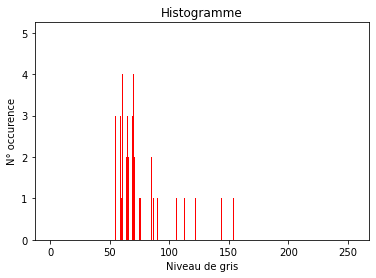

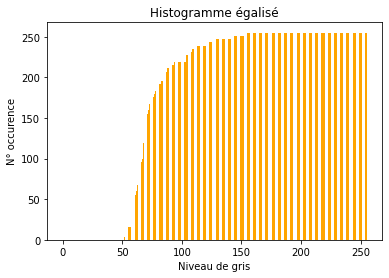

In [8]:
#Histogramme
plt.bar(hist_x, hist_y, color ='red',width = 0.5)
plt.xlabel("Niveau de gris")
plt.ylabel("N° occurence")
plt.title("Histogramme")
plt.show()

"""
dans l'histogramme etendu en remarque que l'axe y 
représente les niveaux de gris de la nouvelle image
"""
#Histogramme égalisé
plt.bar(hist_x,hist_eg_y, color ='orange',width = 0.5)
plt.xlabel("Niveau de gris")
plt.ylabel("N° occurence")
plt.title("Histogramme égalisé")
plt.show()




# Expansion de la dynamique et comparaison avec l'égalisation d'histogramme

[[  0   7  22  17  67  22  60  22]
 [ 25  17   7 130 105  82  17  47]
 [ 27  32  35 152 230 130  27  50]
 [ 30  45  45 185 255 142  47  42]
 [ 37  52  40 135 175  90  40  40]
 [ 40  67  20  45  62  35  15  57]
 [ 42  82  30  15   7  22  32  77]
 [ 45  87  42  40  32  52  65  95]]


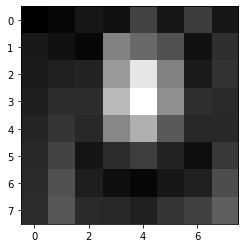

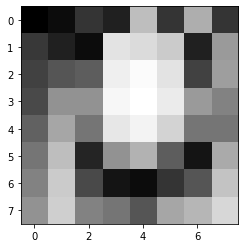

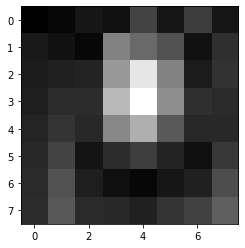

In [9]:
#Expansion de la dynamique
def ExpansionDynamique(image,Lmin,Lmax):
    image3=np.zeros([len(image),len(image[0])],dtype=np.uint8)
    for i in range(len(image)) :
        for j in range(len(image[0])) :
            image3[i,j]=(255)/(Lmax-Lmin)*(image[i,j]-Lmin)
    return image3

image3=ExpansionDynamique(image,Lmin,Lmax)
print(image3)
plt.imshow(image,cmap='gray')
plt.show()
plt.imshow(image2,cmap='gray')
plt.show()
plt.imshow(image3,cmap='gray')
plt.show()


Cette méthode est  également utilisée pour ameliorer le contraste d'une image pour discerner des détails 
invisible dans l'image originale

# Améliorer le contraste des images données
améliorer le contraste des 3 images envoyées avec les méthodes implémentées precedemment.

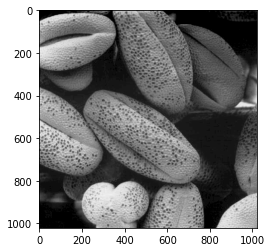

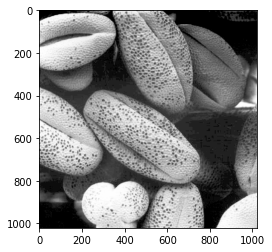

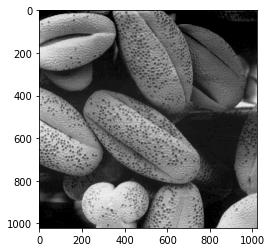

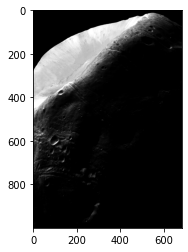

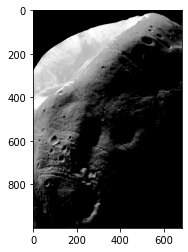

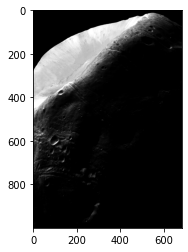

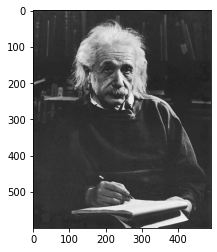

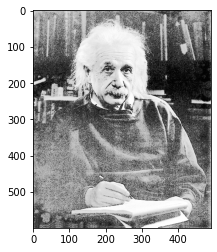

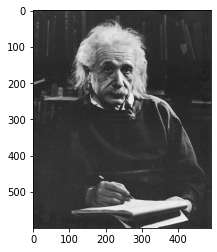

In [10]:
image_test1=cv2.imread('Fig0208(a).tif',0)
image_test1=np.asarray(image_test1)
_,Lmin,Lmax,_,_=Metriques(image_test1)
_,_,_,_,hist_cn_y=GenerateHistograms(image_test1)
_,image_test12=AmeliorationContraste(image_test1,hist_cn_y)
image_test13=ExpansionDynamique(image_test1,Lmin,Lmax)

plt.imshow(image_test1,cmap='gray')
plt.show()
plt.imshow(image_test12,cmap='gray')
cv2.imwrite('Fig0208(a)_2.tif',image_test12)
plt.show()
plt.imshow(image_test13,cmap='gray')
cv2.imwrite('Fig0208(a)_3.tif',image_test13)
plt.show()

image_test2=cv2.imread('Fig0210(a).tif',0)
image_test2=np.asarray(image_test2)
_,Lmin,Lmax,_,_=Metriques(image_test2)
_,_,_,_,hist_cn_y=GenerateHistograms(image_test2)
_,image_test22=AmeliorationContraste(image_test2,hist_cn_y)
image_test23=ExpansionDynamique(image_test2,Lmin,Lmax)
plt.imshow(image_test2,cmap='gray')
plt.show()
plt.imshow(image_test22,cmap='gray')
cv2.imwrite('Fig0210(a)_2.tif',image_test22)
plt.show()
plt.imshow(image_test23,cmap='gray')
cv2.imwrite('Fig0210(a)_3.tif',image_test23)
plt.show()


image_test3=cv2.imread('Fig0228(a).tif',0)
image_test3=np.asarray(image_test3)
_,Lmin,Lmax,_,_=Metriques(image_test3)
_,_,_,_,hist_cn_y=GenerateHistograms(image_test3)
_,image_test32=AmeliorationContraste(image_test3,hist_cn_y)
image_test33=ExpansionDynamique(image_test3,Lmin,Lmax)
plt.imshow(image_test3,cmap='gray')
plt.show()
plt.imshow(image_test32,cmap='gray')
cv2.imwrite('Fig0228(a)_2.tif',image_test32)
plt.show()
plt.imshow(image_test33,cmap='gray')
cv2.imwrite('Fig0228(a)_3.tif',image_test33)
plt.show()


# Gradiant

In [11]:
image2 = np.genfromtxt('mat.csv', delimiter=';')
h,w = image2.shape
imageG = np.zeros([h,w])
imageG=cv2.copyMakeBorder(image2,1,1,1,1,cv2.BORDER_CONSTANT,(0,0,0))

#gradient x
gx = np.zeros([h,w])
for p in range(1,w+1) :
    for l in range(1,h+1) :
        gx[l-1,p-1] = imageG[l+1,p] - imageG[l,p]
print(gx)
#gradient y
gy = np.zeros([h,w])
for l in range(1,h+1) :
    for p in range(1,w+1) :
        gy[l-1,p-1] = imageG[l,p+1] - imageG[l,p]
print(gy)

#Mod
m = np.zeros([h,w])
for l in range(h) :
    for p in range(w) :
        m[l,p]= math.sqrt( gx[l,p]**2 + gy[l,p]**2 );
print(m)
#direction
d = np.zeros([h,w])
for l in range(h) :
    for p in range(w) :
        d[l,p]= math.degrees(math.atan( gy[l,p] / gx[l,p]));
print(d)




[[  57.   20.  -41.  195.   29.  149. -142.  101.]
 [   8.   53.   81.   12.   32.   25.   33.    4.]
 [   8.   61.   53.    8.    4.    8.   89.  -28.]
 [  24.   20.  -29.  -16.  -12.  -25.  -37.  -13.]
 [  20.   24.  -81.  -85.  -65. -117.  -97.   53.]
 [  13.   12.   37. -126. -166.  -40.   65.   24.]
 [  16.    4.   57.   97.   73.  113.   97.   21.]
 [-146. -206. -130. -117.  -85. -166. -182. -215.]]
[[  12.   41.  -21.  158. -137.  121. -121.  -53.]
 [ -25.  -20.  215.   -8.  -17. -170.  122. -154.]
 [  20.    8.  146.   12.  -24. -162.   93. -158.]
 [  73.    0.  101.    8.  -20.  -81.  -24. -130.]
 [  69.  -49.  114.   12.  -33.  -93.    0. -117.]
 [  73. -154.  110.   32.  -85.  -73.  150. -170.]
 [  72. -129.  -53.   -8.   41.   32.  109. -194.]
 [  60.  -76.  -13.  -32.   81.   16.   33. -215.]]
[[ 58.24946352  45.61797891  46.06517123 250.97609448 140.03570973
  191.94269978 186.56098199 114.06138698]
 [ 26.2488095   56.64803615 229.75204025  14.4222051   36.23534186
  171.

Le gradient ou la premiere dérivé d'une image est un changement directionnel de l'itensité d'une image.

# Binarisation

In [12]:
seuil = 70
imageBin = np.zeros([h,w])
for l in range(h) :
    for p in range(w) :
        imageBin[l,p] = int( m[l,p] > seuil)
print(m)
print(imageBin)    




[[ 58.24946352  45.61797891  46.06517123 250.97609448 140.03570973
  191.94269978 186.56098199 114.06138698]
 [ 26.2488095   56.64803615 229.75204025  14.4222051   36.23534186
  171.82840277 126.38433447 154.05193929]
 [ 21.54065923  61.52235366 155.32224567  14.4222051   24.33105012
  162.19741058 128.72451204 160.46183347]
 [ 76.84399781  20.         105.0809212   17.88854382  23.32380758
   84.77027781  44.10215414 130.64838307]
 [ 71.84010022  54.56189146 139.84634425  85.84287973  72.89718787
  149.45902448  97.         128.44454056]
 [ 74.14849965 154.46682492 116.05602096 130.         186.49664876
   83.24061509 163.47782724 171.68575946]
 [ 73.75635566 129.0620006   77.83315489  97.32933782  83.72574276
  117.44360349 145.91093174 195.13328778]
 [157.84802818 219.57231155 130.64838307 121.29715578 117.41379817
  166.76930173 184.96756472 304.05591591]]
[[0. 0. 0. 1. 1. 1. 1. 1.]
 [0. 0. 1. 0. 0. 1. 1. 1.]
 [0. 0. 1. 0. 0. 1. 1. 1.]
 [1. 0. 1. 0. 0. 1. 0. 1.]
 [1. 0. 1. 1. 1. 1.

# Dilatation

In [21]:
#dilatation
dil=np.copy(imageBin)
for i in range(1,h-1):
    for j in range(1,w-1):
        k=imageBin[i,j] + imageBin[i-1,j] + imageBin[i+1,j] + imageBin[i,j-1]+ imageBin[i,j+1]
        if(k>0):
            k=1
        dil[i,j]=k    
        dil[i-1,j]=k
        dil[i+1,j]=k 
        dil[i,j-1]=k
        dil[i,j+1]=k
print(imageBin)
print(dil)
    

[[0. 0. 0. 1. 1. 1. 1. 1.]
 [0. 0. 1. 0. 0. 1. 1. 1.]
 [0. 0. 1. 0. 0. 1. 1. 1.]
 [1. 0. 1. 0. 0. 1. 0. 1.]
 [1. 0. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]]
[[0. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]]


# erosion

In [14]:
#erosione
er=np.copy(imageBin)
for i in range(0,h-2):
    for j in range(0,w-2):
        k=1
        for a in range(i,i+3):
            for b in range(j,j+3):
                 k=k*imageBin[a,b]
        for a in range(i,i+3):
            for b in range(j,j+3):
                er[a,b]=k
        
print(imageBin)
print(er)               
        

[[0. 0. 0. 1. 1. 1. 1. 1.]
 [0. 0. 1. 0. 0. 1. 1. 1.]
 [0. 0. 1. 0. 0. 1. 1. 1.]
 [1. 0. 1. 0. 0. 1. 0. 1.]
 [1. 0. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]]
[[0. 0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]]


La dilatation et l'érosion sont des opérations de traitement morphologique de base qui produisent des résultats contrastés lorsqu'elles sont appliquées à des images en niveaux de gris ou binaires.

Érosion:
L'érosion implique la suppression des pixels sur les bords des régions.

Dilatation:
La dilatation est le processus inverse avec des régions qui sortent de leurs frontières.


# Prewitt & Sobel

In [15]:
#prewitt
c=1
imagepr = np.zeros([h,w])
imagepr=cv2.copyMakeBorder(image2,1,1,1,1,cv2.BORDER_CONSTANT,(0,0,0))
print(imagepr)
cx=[[-1,0,1],[-c,0,c],[-1,0,1]]
cy=[[-1,-c,-1],[0,0,0],[1,c,1]]

prewitt_x=np.zeros([h,w])
prewitt_y=np.zeros([h,w])
for i in range (1,h+1) :
    for j in range(1,w+1):
        for ki in range(3):
            for kj in range(3):
                prewitt_x[i-1,j-1]+=(imagepr[i-1+ki,j-1+kj]*cx[ki][kj])
                prewitt_y[i-1,j-1]+=(imagepr[i-1+ki,j-1+kj]*cy[ki][kj])

print(prewitt_x)
print(prewitt_y)

#sobel
sobel_x=np.zeros([h,w])
sobel_y=np.zeros([h,w])
c=2
cx=[[-1,0,1],[-c,0,c],[-1,0,1]]
cy=[[-1,-c,-1],[0,0,0],[1,c,1]]
for i in range (1,h+1) :
    for j in range(1,w+1):
        for ki in range(3):
            for kj in range(3):
                sobel_x[i-1,j-1]+=imagepr[i-1+ki,j-1+kj]*cx[ki][kj]
                sobel_y[i-1,j-1]+=imagepr[i-1+ki,j-1+kj]*cy[ki][kj]

print(sobel_x)
print(sobel_y)


[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.  12.  53.  32. 190.  53. 174.  53.   0.]
 [  0.  57.  32.  12. 227. 219. 202.  32. 154.   0.]
 [  0.  65.  85.  93. 239. 251. 227.  65. 158.   0.]
 [  0.  73. 146. 146. 247. 255. 235. 154. 130.   0.]
 [  0.  97. 166. 117. 231. 243. 210. 117. 117.   0.]
 [  0. 117. 190.  36. 146. 178.  93.  20. 170.   0.]
 [  0. 130. 202.  73.  20.  12.  53.  85. 194.   0.]
 [  0. 146. 206. 130. 117.  85. 166. 182. 215.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]]
[[  44.    8.  215.  344.   -4. -203.  -48. -206.]
 [ 129.   36.  369.  502.  -16. -389. -117. -271.]
 [ 263.   56.  450.  474.  -49. -474. -222. -251.]
 [ 397.  121.  320.  393.  -45. -413. -267. -336.]
 [ 502.   12.  122.  377.  -86. -385. -121. -291.]
 [ 558. -118. -161.  207.  -41. -211.  125. -222.]
 [ 598. -154. -315.   36.   29.   12.  267. -287.]
 [ 408.  -73. -271. -106.   82.  170.  190. -267.]]
[[  89.  101.  271.  458.  648.  453.  388.  186.]
 [ 138.  

L'opérateur Prewitt est similaire à l'opérateur Sobel et sont utilisés pour détecter les contours(calcul de gradient) verticaux et horizontaux dans les images.

# Laplacian

In [16]:
#laplacian
lp_mask=[[0,1,0],[1,-4,1],[0,1,0]]
lp=np.zeros([h,w])
print(imagepr)
for i in range (1,h+1) :
    for j in range(1,w+1):
        for ki in range(3):
            for kj in range(3):
                lp[i-1,j-1]+=imagepr[i-1+ki,j-1+kj]*lp_mask[ki][kj]
                
print(lp)



[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.  12.  53.  32. 190.  53. 174.  53.   0.]
 [  0.  57.  32.  12. 227. 219. 202.  32. 154.   0.]
 [  0.  65.  85.  93. 239. 251. 227.  65. 158.   0.]
 [  0.  73. 146. 146. 247. 255. 235. 154. 130.   0.]
 [  0.  97. 166. 117. 231. 243. 210. 117. 117.   0.]
 [  0. 117. 190.  36. 146. 178.  93.  20. 170.   0.]
 [  0. 130. 202.  73.  20.  12.  53.  85. 194.   0.]
 [  0. 146. 206. 130. 117.  85. 166. 182. 215.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]]
[[  69.   37. -156.  342. -456.  354. -558.  116.]
 [-131.   38.  357. -406.   -6. -277.  467. -373.]
 [ -45.   -4.  110. -138.  -64. -155.  311. -283.]
 [  16. -114.   19. -117.  -44.  -94.  -69.  -91.]
 [ -32. -114.  111. -171.  -98. -152.   33.  -51.]
 [ -51. -239.  382. -119. -218.   89.  385. -349.]
 [ -55. -209.   96.  268.  288.  144.  109. -306.]
 [-248. -346. -124. -233.  -45. -344. -262. -484.]]


Le filtre Laplacien est un filtre d'accentuation des bords, qui accentue les bords de l'image.
Il est particulièrement bon pour trouver les détails fins d'une image. Toute caractéristique avec une discontinuité nette sera améliorée par un opérateur laplacien. 

# Filtre Moyen

In [17]:
#filtre moyen
fm=np.zeros([h,w])
for i in range (1,h+1) :
    for j in range(1,w+1):
        for ki in range(3):
            for kj in range(3):
                fm[i-1,j-1]+=imagepr[i-1+ki,j-1+kj]
        fm[i-1][j-1]/= 9                       
print(fm)


[[ 11.22222222  18.44444444  40.88888889  81.44444444 102.55555556
   96.66666667  74.22222222  45.88888889]
 [ 27.88888889  45.44444444  87.22222222 146.22222222 182.22222222
  157.         124.22222222  70.66666667]
 [ 50.88888889  78.77777778 136.33333333 187.66666667 233.55555556
  182.22222222 150.77777778  77.        ]
 [ 70.22222222 109.77777778 163.33333333 202.44444444 237.55555556
  195.22222222 157.          82.33333333]
 [ 87.66666667 120.88888889 158.33333333 177.66666667 204.22222222
  167.22222222 138.44444444  78.66666667]
 [100.22222222 125.33333333 131.22222222 117.33333333 131.77777778
  112.33333333 117.66666667  78.11111111]
 [110.11111111 136.66666667 124.44444444  88.55555556  96.66666667
   97.11111111 130.88888889  96.22222222]
 [ 76.          98.55555556  83.11111111  48.55555556  50.33333333
   64.77777778  99.44444444  75.11111111]]


C'est un filtre de lissage spacial , il est utilisé pour réduire la quantité de variation d'intensité entre un pixel et le suivant

# Filtre gaussien

In [18]:
#filtre gaussien 
gauss_mask=[[0.36,0.61,0.37],[0.61,1,0.6],[0.37,0.6,0.36]]
fg=np.zeros([h,w])
print(imagepr)
for i in range (1,h+1) :
    for j in range(1,w+1):
        for ki in range(3):
            for kj in range(3):
                fg[i-1,j-1]+=imagepr[i-1+ki,j-1+kj]*gauss_mask[ki][kj]
                
print(fg)        

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.  12.  53.  32. 190.  53. 174.  53.   0.]
 [  0.  57.  32.  12. 227. 219. 202.  32. 154.   0.]
 [  0.  65.  85.  93. 239. 251. 227.  65. 158.   0.]
 [  0.  73. 146. 146. 247. 255. 235. 154. 130.   0.]
 [  0.  97. 166. 117. 231. 243. 210. 117. 117.   0.]
 [  0. 117. 190.  36. 146. 178.  93.  20. 170.   0.]
 [  0. 130. 202.  73.  20.  12.  53.  85. 194.   0.]
 [  0. 146. 206. 130. 117.  85. 166. 182. 215.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]]
[[  52.92   88.41  180.28  397.81  529.43  487.05  387.51  263.38]
 [ 150.24  209.43  389.5   742.79  946.45  772.37  572.32  387.34]
 [ 258.97  392.1   621.62  964.17 1152.03  923.8   673.64  438.09]
 [ 349.66  565.4   773.8  1030.57 1176.68  993.86  745.2   457.21]
 [ 433.75  634.98  734.33  910.75 1035.63  849.42  649.55  432.51]
 [ 502.31  658.02  581.84  591.03  665.63  539.29  509.44  443.54]
 [ 554.63  720.86  548.94  388.51  405.6   436.1   590.33  553.09]


le filtre gaussien est filtre de lissage qui a comme le résultat  une image floue .
Il consiste a reduire les détails et le bruit.  

# Filtre median

In [19]:
#filtre median
l=[]
fmed=np.zeros([h,w])
for i in range(1,h+1):
    for j in range(1,w+1):
        for ki in range(i-1,i+2):
            for kj in range(j-1,j+2):
                l.append(imagepr[ki,kj])
        l.sort()
        fmed[i-1,j-1]=l[4]
        l.clear()
        
print(fmed)        
         

[[  0.  12.  12.  32.  53.  53.  53.   0.]
 [ 12.  53.  53. 190. 219. 190. 154.  53.]
 [ 57.  73. 146. 227. 235. 219. 154.  65.]
 [ 73.  97. 146. 239. 239. 227. 154. 117.]
 [ 97. 117. 146. 178. 231. 178. 130. 117.]
 [117. 117. 146. 117. 146.  93. 117.  85.]
 [130. 130. 130.  85.  93.  85. 166.  85.]
 [  0. 130.  73.  20.  20.  53.  85.   0.]]


c'est un filtre non linaires , il consiste a filtre mieux le bruit impulsionnel (type poivre et sel),
mais il peut supprime aussi les details fins qui ne sont pas de bruit et il coute en temps par rapport au autre filtre.

# Consignes
Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le vendredi à 19h


In [20]:
# bonne chance